In [597]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
import catboost as cb
from sklearn.svm import SVR

In [411]:
df=pd.read_csv('train.csv')

In [412]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [413]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [414]:
df.shape

(8693, 14)

In [415]:
df['PassengerId'].str[-2:].value_counts(dropna=False)

01    6217
02    1412
03     571
04     231
05     128
06      75
07      46
08      13
Name: PassengerId, dtype: int64

In [416]:
df['pass_Id_last']= df['PassengerId'].str[-2:]

In [510]:
df['pass_Id_last']= pd.to_numeric(df['pass_Id_last'])

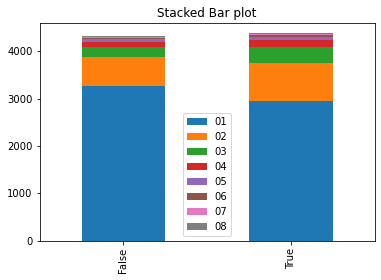

In [417]:
# Stacked barplot with pandas
f = df.loc[df['Transported']==False]['PassengerId'].str[-2:].value_counts()
t= df.loc[df['Transported']==True]['PassengerId'].str[-2:].value_counts()
Inter_plot  = pd.DataFrame([f,t])
Inter_plot.index=['False','True']
# Plot
Inter_plot.plot(kind='bar',stacked=True, title='Stacked Bar plot')


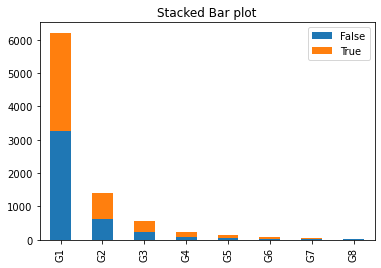

In [418]:
G1 = df.loc[df['PassengerId'].str[-2:]=='01']['Transported'].value_counts()
G2 = df.loc[df['PassengerId'].str[-2:]=='02']['Transported'].value_counts()
G3 = df.loc[df['PassengerId'].str[-2:]=='03']['Transported'].value_counts()
G4 = df.loc[df['PassengerId'].str[-2:]=='04']['Transported'].value_counts()
G5 = df.loc[df['PassengerId'].str[-2:]=='05']['Transported'].value_counts()
G6 = df.loc[df['PassengerId'].str[-2:]=='06']['Transported'].value_counts()
G7 = df.loc[df['PassengerId'].str[-2:]=='07']['Transported'].value_counts()
G8 = df.loc[df['PassengerId'].str[-2:]=='08']['Transported'].value_counts()

Inter_plot  = pd.DataFrame([G1,G2,G3,G4,G5,G6,G7,G8])
Inter_plot.index=['G1','G2','G3','G4','G5','G6','G7','G8']
# Plot
Inter_plot.plot(kind='bar',stacked=True, title='Stacked Bar plot')

In [419]:
df['HomePlanet'].value_counts(dropna=False)

Earth     4602
Europa    2131
Mars      1759
NaN        201
Name: HomePlanet, dtype: int64

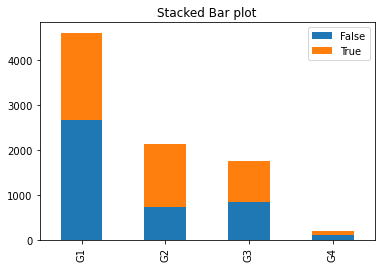

In [420]:
G1 = df.loc[df['HomePlanet']=='Earth']['Transported'].value_counts()
G2 = df.loc[df['HomePlanet']=='Europa']['Transported'].value_counts()
G3 = df.loc[df['HomePlanet']=='Mars']['Transported'].value_counts()
G4 = df.loc[df['HomePlanet'].isna()]['Transported'].value_counts()

Inter_plot  = pd.DataFrame([G1,G2,G3,G4])
Inter_plot.index=['G1','G2','G3','G4']
# Plot
Inter_plot.plot(kind='bar',stacked=True, title='Stacked Bar plot')

In [421]:
filt= df['HomePlanet'].isna()
df.loc[filt, 'HomePlanet']= 'NA'
df['HomePlanet'].value_counts(dropna=False)

Earth     4602
Europa    2131
Mars      1759
NA         201
Name: HomePlanet, dtype: int64

In [422]:
df.groupby(['Age','Transported'])['PassengerId'].agg('count')

Age   Transported
0.0   False           34
      True           144
1.0   False           18
      True            49
2.0   False           22
                    ... 
77.0  False            1
      True             1
78.0  False            2
      True             1
79.0  False            3
Name: PassengerId, Length: 159, dtype: int64

In [423]:
df['bins_age'] = pd.qcut(df['Age'], 5, duplicates= 'drop')

In [424]:
df.groupby(['bins_age','Transported']).agg({'Transported':'count'})

Transported
bins_age       Transported             
(-0.001, 18.0] False                732
               True                1133
(18.0, 24.0]   False                988
               True                 800
(24.0, 31.0]   False                853
               True                 799
(31.0, 41.0]   False                836
               True                 771
(41.0, 79.0]   False                817
               True                 785

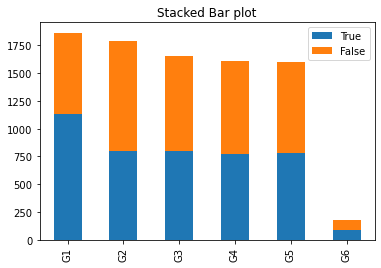

In [425]:
G1 = df.loc[df['bins_age']==pd.Interval(-0.001, 18.0, closed='right')]['Transported'].value_counts()
G2 = df.loc[df['bins_age']==pd.Interval(18.0, 24.0, closed='right')]['Transported'].value_counts()
G3 = df.loc[df['bins_age']==pd.Interval(24.0, 31.0, closed='right')]['Transported'].value_counts()
G4 = df.loc[df['bins_age']==pd.Interval(31.0, 41.0, closed='right')]['Transported'].value_counts()
G5 = df.loc[df['bins_age']==pd.Interval(41.0, 79.0, closed='right')]['Transported'].value_counts()
G6 = df.loc[df['bins_age'].isna()]['Transported'].value_counts()
Inter_plot  = pd.DataFrame([G1,G2,G3,G4,G5,G6])
Inter_plot.index=['G1','G2','G3','G4','G5','G6']
# Plot
Inter_plot.plot(kind='bar',stacked=True, title='Stacked Bar plot')


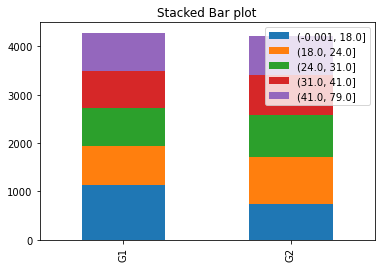

In [426]:
G1 = df.loc[df['Transported']==True]['bins_age'].value_counts()
G2 = df.loc[df['Transported']==False]['bins_age'].value_counts()
Inter_plot  = pd.DataFrame([G1,G2])
Inter_plot.index=['G1','G2']
# Plot
Inter_plot.plot(kind='bar',stacked=True, title='Stacked Bar plot')

In [427]:
pd.set_option('display.max_rows',100)

In [428]:
df['Age'].value_counts(dropna=False)

24.0    324
18.0    320
21.0    311
19.0    293
23.0    292
22.0    291
20.0    277
26.0    268
28.0    267
27.0    259
25.0    243
29.0    230
31.0    202
32.0    199
30.0    183
NaN     179
33.0    178
36.0    178
0.0     178
37.0    177
35.0    171
38.0    161
17.0    158
15.0    155
34.0    148
16.0    147
13.0    141
14.0    138
39.0    138
41.0    129
40.0    128
43.0    128
42.0    119
44.0    115
46.0     97
45.0     89
47.0     88
49.0     83
2.0      75
3.0      75
50.0     74
48.0     72
4.0      71
55.0     68
1.0      67
54.0     67
53.0     61
51.0     59
52.0     52
7.0      52
56.0     48
58.0     47
11.0     47
8.0      46
57.0     46
9.0      42
12.0     41
6.0      40
10.0     39
59.0     35
60.0     34
5.0      33
61.0     32
64.0     29
62.0     26
63.0     26
65.0     23
67.0     13
68.0     12
70.0      9
66.0      7
71.0      7
73.0      7
69.0      6
74.0      5
72.0      4
75.0      4
79.0      3
78.0      3
77.0      2
76.0      2
Name: Age, dtype: int64

In [429]:
ag= pd.DataFrame(df.groupby(['Age']).agg({'PassengerId':'count'})).reset_index()
ag

,Age,PassengerId
0,0.0,178
1,1.0,67
2,2.0,75
3,3.0,75
4,4.0,71
5,5.0,33
6,6.0,40
7,7.0,52
8,8.0,46
9,9.0,42


<BarContainer object of 80 artists>

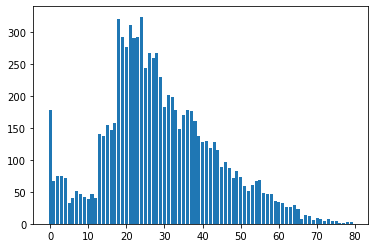

In [430]:
plt.bar(ag['Age'], ag['PassengerId'])

In [431]:
df['Age']= pd.to_numeric(df['Age'])

In [432]:
df['Age'].dtype

dtype('float64')

In [433]:
df['Age'].mean()

28.82793046746535

In [434]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [435]:
df['Age'].value_counts(dropna=False)

24.00000    324
18.00000    320
21.00000    311
19.00000    293
23.00000    292
22.00000    291
20.00000    277
26.00000    268
28.00000    267
27.00000    259
25.00000    243
29.00000    230
31.00000    202
32.00000    199
30.00000    183
28.82793    179
36.00000    178
33.00000    178
0.00000     178
37.00000    177
35.00000    171
38.00000    161
17.00000    158
15.00000    155
34.00000    148
16.00000    147
13.00000    141
14.00000    138
39.00000    138
41.00000    129
43.00000    128
40.00000    128
42.00000    119
44.00000    115
46.00000     97
45.00000     89
47.00000     88
49.00000     83
2.00000      75
3.00000      75
50.00000     74
48.00000     72
4.00000      71
55.00000     68
54.00000     67
1.00000      67
53.00000     61
51.00000     59
52.00000     52
7.00000      52
56.00000     48
58.00000     47
11.00000     47
57.00000     46
8.00000      46
9.00000      42
12.00000     41
6.00000      40
10.00000     39
59.00000     35
60.00000     34
5.00000      33
61.00000

In [436]:
del df['bins_age']

In [437]:
df['CryoSleep'].value_counts(dropna=False)

False    5439
True     3037
NaN       217
Name: CryoSleep, dtype: int64

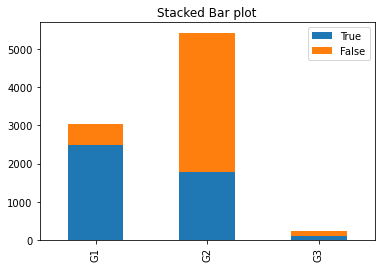

In [438]:
G1 = df.loc[df['CryoSleep']==True]['Transported'].value_counts()
G2 = df.loc[df['CryoSleep']==False]['Transported'].value_counts()
G3 = df.loc[df['CryoSleep'].isna()]['Transported'].value_counts()
Inter_plot  = pd.DataFrame([G1,G2,G3])
Inter_plot.index=['G1','G2','G3']
# Plot
Inter_plot.plot(kind='bar',stacked=True, title='Stacked Bar plot')

In [439]:
filt= df['CryoSleep'].isna()
df.loc[filt,'CryoSleep']='other'
df['CryoSleep'].value_counts(dropna=False)

False    5439
True     3037
other     217
Name: CryoSleep, dtype: int64

In [440]:
df['Cabin'].value_counts(dropna=False)

NaN         199
G/734/S       8
B/11/S        7
G/1368/P      7
F/1194/P      7
           ... 
G/405/S       1
F/894/P       1
F/19/P        1
F/617/S       1
F/1522/S      1
Name: Cabin, Length: 6561, dtype: int64

In [441]:
df['Cabin'].str[0].value_counts(dropna=False)

F      2794
G      2559
E       876
B       779
C       747
D       478
A       256
NaN     199
T         5
Name: Cabin, dtype: int64

In [442]:
df['Cabin_first']= df['Cabin'].str[0]

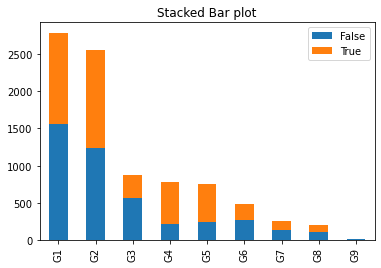

In [443]:
G1 = df.loc[df['Cabin_first']=='F']['Transported'].value_counts()
G2 = df.loc[df['Cabin_first']=='G']['Transported'].value_counts()
G3 = df.loc[df['Cabin_first']=='E']['Transported'].value_counts()
G4 = df.loc[df['Cabin_first']=='B']['Transported'].value_counts()
G5 = df.loc[df['Cabin_first']=='C']['Transported'].value_counts()
G6 = df.loc[df['Cabin_first']=='D']['Transported'].value_counts()
G7 = df.loc[df['Cabin_first']=='A']['Transported'].value_counts()
G8 = df.loc[df['Cabin_first'].isna()]['Transported'].value_counts()
G9 = df.loc[df['Cabin_first']=='T']['Transported'].value_counts()
Inter_plot  = pd.DataFrame([G1,G2,G3,G4,G5,G6,G7,G8,G9])
Inter_plot.index=['G1','G2','G3','G4','G5','G6','G7','G8','G9']
# Plot
Inter_plot.plot(kind='bar',stacked=True, title='Stacked Bar plot')

In [444]:
filt= df['Cabin_first'].isna()
df.loc[filt, 'Transported'].value_counts(dropna=False)

True     100
False     99
Name: Transported, dtype: int64

In [445]:
filt= df['Cabin_first'].isna()
df.loc[filt, 'Cabin_first']='NA'

In [446]:
df['Cabin_first'].value_counts(dropna=False)

F     2794
G     2559
E      876
B      779
C      747
D      478
A      256
NA     199
T        5
Name: Cabin_first, dtype: int64

In [447]:
df['Cabin'].str[-1].value_counts(dropna=False)

S      4288
P      4206
NaN     199
Name: Cabin, dtype: int64

In [448]:
df['Cabin_end']= df['Cabin'].str[-1]

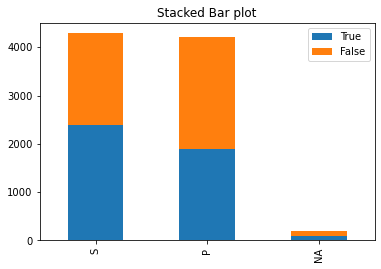

In [449]:
G1 = df.loc[df['Cabin_end']=='S']['Transported'].value_counts()
G2 = df.loc[df['Cabin_end']=='P']['Transported'].value_counts()
G3 = df.loc[df['Cabin_end'].isna()]['Transported'].value_counts()
Inter_plot  = pd.DataFrame([G1,G2,G3])
Inter_plot.index=['S','P','NA']
# Plot
Inter_plot.plot(kind='bar',stacked=True, title='Stacked Bar plot')

In [450]:
filt= df['Cabin_end'].isna()
df.loc[filt, 'Cabin_end']='NA'

In [451]:
df['Cabin_middle']= df['Cabin'].str.split("/",expand=True)[1]

In [452]:
df['Cabin_middle'].value_counts(dropna=False)

NaN     199
82       28
86       22
19       22
97       21
       ... 
1669      1
1567      1
1840      1
1622      1
1837      1
Name: Cabin_middle, Length: 1818, dtype: int64

In [453]:
df['Cabin_middle'].dtype

dtype('O')

In [454]:
df['Cabin_middle']= pd.to_numeric(df['Cabin_middle'])

In [455]:
df['Cabin_middle'].dtype

dtype('float64')

In [456]:
ag= pd.DataFrame(df.groupby(['Cabin_middle']).agg({'PassengerId':'count'})).reset_index()
ag

,Cabin_middle,PassengerId
0,0.0,18
1,1.0,15
2,2.0,11
3,3.0,16
4,4.0,7
...,...,...
1812,1888.0,2
1813,1891.0,1
1814,1892.0,1
1815,1893.0,1


<BarContainer object of 1817 artists>

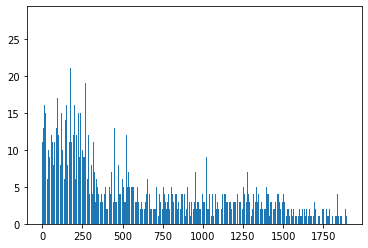

In [457]:
plt.bar(ag['Cabin_middle'], ag['PassengerId'])

In [458]:
df['bins_Cabin_middle'] = pd.qcut(df['Cabin_middle'], 5, duplicates= 'drop')

In [459]:
df.groupby(['bins_Cabin_middle','Transported']).agg({'Transported':'count'})

Transported
bins_Cabin_middle Transported             
(-0.001, 129.0]   False                796
                  True                 907
(129.0, 282.0]    False                775
                  True                 922
(282.0, 610.8]    False                970
                  True                 726
(610.8, 1126.0]   False                705
                  True                 997
(1126.0, 1894.0]  False                970
                  True                 726

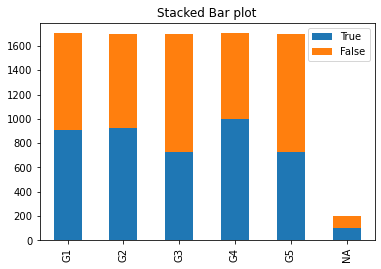

In [460]:
G1 = df.loc[df['bins_Cabin_middle']==pd.Interval(-0.001, 129.0, closed='right')]['Transported'].value_counts()
G2 = df.loc[df['bins_Cabin_middle']==pd.Interval(129.0, 282.0, closed='right')]['Transported'].value_counts()
G3 = df.loc[df['bins_Cabin_middle']==pd.Interval(282.0, 610.8, closed='right')]['Transported'].value_counts()
G4 = df.loc[df['bins_Cabin_middle']==pd.Interval(610.8, 1126.0, closed='right')]['Transported'].value_counts()
G5 = df.loc[df['bins_Cabin_middle']==pd.Interval(1126.0, 1894.0, closed='right')]['Transported'].value_counts()
G6 = df.loc[df['bins_Cabin_middle'].isna()]['Transported'].value_counts()
Inter_plot  = pd.DataFrame([G1,G2,G3,G4,G5,G6])
Inter_plot.index=['G1','G2','G3','G4','G5','NA']
# Plot
Inter_plot.plot(kind='bar',stacked=True, title='Stacked Bar plot')


In [461]:
filt= df['Cabin_middle'].isna()
df.loc[filt, 'Cabin_middle']= -1

In [462]:
df['Cabin_middle'].value_counts(dropna=False)

-1.0       199
 82.0       28
 19.0       22
 86.0       22
 97.0       21
          ... 
 944.0       1
 1255.0      1
 1525.0      1
 1660.0      1
 1821.0      1
Name: Cabin_middle, Length: 1818, dtype: int64

In [463]:
del df['bins_Cabin_middle']

In [464]:
df['Destination'].value_counts(dropna=False)

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
NaN               182
Name: Destination, dtype: int64

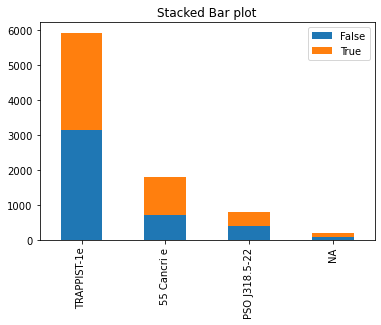

In [465]:
G1 = df.loc[df['Destination']=='TRAPPIST-1e']['Transported'].value_counts()
G2 = df.loc[df['Destination']=='55 Cancri e']['Transported'].value_counts()
G3 = df.loc[df['Destination']=='PSO J318.5-22']['Transported'].value_counts()
G4 = df.loc[df['Destination'].isna()]['Transported'].value_counts()
Inter_plot  = pd.DataFrame([G1,G2,G3,G4])
Inter_plot.index=['TRAPPIST-1e','55 Cancri e','PSO J318.5-22', 'NA']
# Plot
Inter_plot.plot(kind='bar',stacked=True, title='Stacked Bar plot')

In [466]:
filt= df['Destination'].isna()
df.loc[filt, 'Destination']='NA'

In [467]:
df['Destination'].value_counts(dropna=False)

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
NA                182
Name: Destination, dtype: int64

In [468]:
filt=df['Age']==0
df.loc[filt]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,pass_Id_last,Cabin_first,Cabin_end,Cabin_middle
19,0017_01,Earth,False,G/0/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Lyde Brighttt,True,01,G,P,0.0
61,0067_01,Earth,True,G/10/S,PSO J318.5-22,0.0,False,0.0,0.0,0.0,0.0,0.0,Ninaha Leeves,True,01,G,S,10.0
86,0092_02,Earth,True,G/9/P,TRAPPIST-1e,0.0,False,0.0,0.0,NaN,0.0,0.0,Stald Hewson,True,02,G,P,9.0
102,0108_03,Earth,False,G/19/S,TRAPPIST-1e,0.0,NaN,0.0,0.0,0.0,0.0,0.0,Oline Handertiz,True,03,G,S,19.0
157,0179_02,Earth,False,G/26/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Raque Webstephrey,False,02,G,P,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8494,9074_01,Earth,True,G/1460/S,TRAPPIST-1e,0.0,NaN,0.0,0.0,NaN,0.0,0.0,Adamie Trerady,True,01,G,S,1460.0
8584,9163_01,Earth,True,G/1477/S,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Idace Edwartizman,True,01,G,S,1477.0
8650,9227_04,Earth,True,G/1498/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Robyny Hinglendez,True,04,G,P,1498.0
8654,9231_02,Mars,False,F/1888/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Walls Paie,True,02,F,P,1888.0


In [469]:
df['VIP'].value_counts(dropna=False)

False    8291
NaN       203
True      199
Name: VIP, dtype: int64

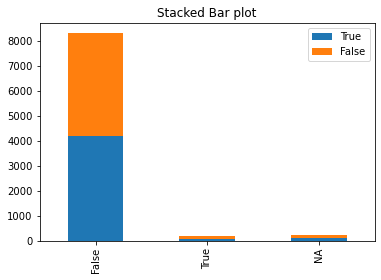

In [470]:
G1 = df.loc[df['VIP']==False]['Transported'].value_counts()
G2 = df.loc[df['VIP']==True]['Transported'].value_counts()
G3 = df.loc[df['VIP'].isna()]['Transported'].value_counts()

Inter_plot  = pd.DataFrame([G1,G2,G3])
Inter_plot.index=['False','True','NA']
# Plot
Inter_plot.plot(kind='bar',stacked=True, title='Stacked Bar plot')

In [471]:
filt= df['VIP'].isna()
df.loc[filt, 'VIP']='other'

In [472]:
df['VIP'].value_counts(dropna=False)

False    8291
other     203
True      199
Name: VIP, dtype: int64

In [473]:
filt=df['Age']==0
df.loc[filt, 'RoomService'].value_counts(dropna=False)

0.0    174
NaN      4
Name: RoomService, dtype: int64

In [474]:
df['RoomService'].value_counts(dropna=False)

0.0       5577
NaN        181
1.0        117
2.0         79
3.0         61
          ... 
1230.0       1
987.0        1
930.0        1
3097.0       1
1186.0       1
Name: RoomService, Length: 1274, dtype: int64

In [475]:
df.loc[df['RoomService'].isna()].groupby(['Transported']).count()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,pass_Id_last,Cabin_first,Cabin_end,Cabin_middle
Transported,,,,,,,,,,,,,,,,,
False,98,98,98,95,98,98,98,0,96,97,97,96,97,98,98,98,98
True,83,83,83,82,83,83,83,0,83,80,81,83,83,83,83,83,83


In [476]:
df.loc[df['RoomService'].isna(), 'Transported'].value_counts()

False    98
True     83
Name: Transported, dtype: int64

In [477]:
df['RoomService'].value_counts(dropna=False)

0.0       5577
NaN        181
1.0        117
2.0         79
3.0         61
          ... 
1230.0       1
987.0        1
930.0        1
3097.0       1
1186.0       1
Name: RoomService, Length: 1274, dtype: int64

In [478]:
df['bins_RoomService']= pd.qcut(df['RoomService'], 6, duplicates='drop')

In [479]:
df['bins_RoomService'].value_counts(dropna=False)

(-0.001, 1.0]       5694
(355.5, 14327.0]    1419
(1.0, 355.5]        1399
NaN                  181
Name: bins_RoomService, dtype: int64

In [480]:
df.groupby(['bins_RoomService', 'Transported']).agg({'Transported':'count'})

Transported
bins_RoomService Transported             
(-0.001, 1.0]    False               2122
                 True                3572
(1.0, 355.5]     False                898
                 True                 501
(355.5, 14327.0] False               1197
                 True                 222

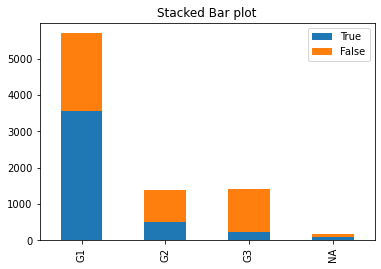

In [481]:
G1 = df.loc[df['bins_RoomService']==pd.Interval(-0.001,1.0, closed='right')]['Transported'].value_counts()
G2 = df.loc[df['bins_RoomService']==pd.Interval(1.0, 355.5, closed='right')]['Transported'].value_counts()
G3 = df.loc[df['bins_RoomService']==pd.Interval(355.5, 14327.0, closed='right')]['Transported'].value_counts()
G4 = df.loc[df['bins_RoomService'].isna()]['Transported'].value_counts()
Inter_plot  = pd.DataFrame([G1,G2,G3,G4])
Inter_plot.index=['G1','G2','G3','NA']
# Plot
Inter_plot.plot(kind='bar',stacked=True, title='Stacked Bar plot')

In [482]:
filt= df['RoomService'].isna()
df.loc[filt, 'RoomService']= -1

In [483]:
df['RoomService'].value_counts(dropna=False)

 0.0       5577
-1.0        181
 1.0        117
 2.0         79
 3.0         61
           ... 
 1230.0       1
 987.0        1
 930.0        1
 3097.0       1
 1186.0       1
Name: RoomService, Length: 1274, dtype: int64

In [484]:
del df['bins_RoomService']

In [485]:
df['FoodCourt'].value_counts(dropna=False)

0.0       5456
NaN        183
1.0        116
2.0         75
4.0         53
          ... 
3206.0       1
3879.0       1
734.0        1
4076.0       1
1910.0       1
Name: FoodCourt, Length: 1508, dtype: int64

In [486]:
df['bins_FoodCourt'] = pd.qcut(df['FoodCourt'], 6, duplicates='drop')
df['bins_FoodCourt'].value_counts(dropna=False)

(-0.001, 3.0]       5700
(490.0, 29813.0]    1416
(3.0, 490.0]        1394
NaN                  183
Name: bins_FoodCourt, dtype: int64

In [487]:
df.groupby(['bins_FoodCourt','Transported']).agg({'Transported':'count'})

Transported
bins_FoodCourt   Transported             
(-0.001, 3.0]    False               2424
                 True                3276
(3.0, 490.0]     False               1071
                 True                 323
(490.0, 29813.0] False                736
                 True                 680

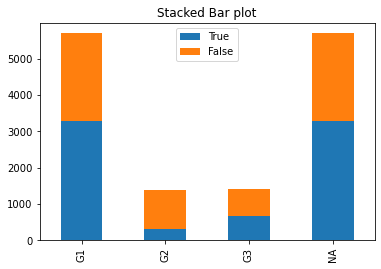

In [488]:
G1= df.loc[df['bins_FoodCourt']==pd.Interval(-0.001,3.0, closed='right')]['Transported'].value_counts()
G2= df.loc[df['bins_FoodCourt']==pd.Interval(3.0, 490.0, closed='right')]['Transported'].value_counts()
G3= df.loc[df['bins_FoodCourt']==pd.Interval(490, 29813.0, closed='right')]['Transported'].value_counts()
G4= df.loc[df['bins_FoodCourt']==pd.Interval(-0.001,3.0, closed='right')]['Transported'].value_counts()
Inter_plot  = pd.DataFrame([G1,G2,G3,G4])
Inter_plot.index=['G1','G2','G3','NA']
# Plot
Inter_plot.plot(kind='bar',stacked=True, title='Stacked Bar plot')

In [489]:
filt= df['FoodCourt'].isna()
df.loc[filt, 'FoodCourt']= -1

In [490]:
df['FoodCourt'].value_counts(dropna=False)

 0.0       5456
-1.0        183
 1.0        116
 2.0         75
 4.0         53
           ... 
 3206.0       1
 3879.0       1
 734.0        1
 4076.0       1
 1910.0       1
Name: FoodCourt, Length: 1508, dtype: int64

In [491]:
del df['bins_FoodCourt']

In [492]:
df['ShoppingMall'].value_counts(dropna=False)

0.0       5587
NaN        208
1.0        153
2.0         80
3.0         59
          ... 
495.0        1
1828.0       1
775.0        1
1324.0       1
2975.0       1
Name: ShoppingMall, Length: 1116, dtype: int64

In [493]:
filt= df['ShoppingMall'].isna()
df.loc[filt, 'ShoppingMall']= -1

In [494]:
df['Spa'].value_counts(dropna=False)

0.0       5324
NaN        183
1.0        146
2.0        105
5.0         53
          ... 
1104.0       1
892.0        1
1559.0       1
777.0        1
2234.0       1
Name: Spa, Length: 1328, dtype: int64

In [495]:
filt= df['Spa'].isna()
df.loc[filt, 'Spa']= -1

In [496]:
df['VRDeck'].value_counts(dropna=False)

0.0       5495
NaN        188
1.0        139
2.0         70
3.0         56
          ... 
3379.0       1
4195.0       1
679.0        1
3687.0       1
1543.0       1
Name: VRDeck, Length: 1307, dtype: int64

In [497]:
filt= df['VRDeck'].isna()
df.loc[filt, 'VRDeck']= -1

In [498]:
df['Transported'].value_counts(dropna=False)

True     4378
False    4315
Name: Transported, dtype: int64

In [499]:
df.corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_middle
Age,1.000000,0.068428,0.127342,0.032847,0.121071,0.099552,-0.074249,-0.128125
RoomService,0.068428,1.000000,-0.015125,0.052333,0.009241,-0.018622,-0.241118,-0.012679
FoodCourt,0.127342,-0.015125,1.000000,-0.013715,0.221469,0.224572,0.045582,-0.177187
ShoppingMall,0.032847,0.052333,-0.013715,1.000000,0.014546,-0.007852,0.009387,0.003533
Spa,0.121071,0.009241,0.221469,0.014546,1.000000,0.147656,-0.218543,-0.129224
VRDeck,0.099552,-0.018622,0.224572,-0.007852,0.147656,1.000000,-0.204873,-0.133065
Transported,-0.074249,-0.241118,0.045582,0.009387,-0.218543,-0.204873,1.000000,-0.043830
Cabin_middle,-0.128125,-0.012679,-0.177187,0.003533,-0.129224,-0.133065,-0.043830,1.000000


In [500]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,pass_Id_last,Cabin_first,Cabin_end,Cabin_middle
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,01,B,P,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,01,F,S,0.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,01,A,S,0.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,02,A,S,0.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,01,F,S,1.0


In [501]:
del df['Cabin']

In [502]:
df['pass_Id_first']=df['PassengerId'].str.split('_',expand=True)[0]

In [503]:
df['pass_Id_first'].value_counts(dropna=False)

8796    8
8956    8
4005    8
5133    8
4256    8
       ..
1078    1
4943    1
8324    1
0188    1
6463    1
Name: pass_Id_first, Length: 6217, dtype: int64

In [504]:
filt=df['pass_Id_first']=='8956'
df[filt]

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,pass_Id_last,Cabin_first,Cabin_end,Cabin_middle,pass_Id_first
8371,8956_01,Earth,False,TRAPPIST-1e,25.00000,False,0.0,0.0,0.0,6.0,1989.0,Mela Bonnondry,False,01,F,P,1838.0,8956
8372,8956_02,Earth,True,NA,20.00000,False,0.0,0.0,0.0,0.0,0.0,Erina Bonnondry,True,02,G,P,1453.0,8956
8373,8956_03,Earth,False,PSO J318.5-22,24.00000,False,0.0,0.0,40.0,0.0,575.0,Sallyl Bonnondry,False,03,G,P,1453.0,8956
8374,8956_04,Earth,False,TRAPPIST-1e,28.82793,False,194.0,1.0,10.0,629.0,0.0,Krisa Bonnondry,False,04,G,P,1453.0,8956
8375,8956_05,Earth,True,TRAPPIST-1e,21.00000,False,0.0,0.0,0.0,0.0,0.0,Deandy Bonnondry,False,05,G,P,1453.0,8956
8376,8956_06,Earth,False,PSO J318.5-22,22.00000,False,0.0,29.0,165.0,404.0,0.0,Valex Bonnondry,False,06,F,P,1838.0,8956
8377,8956_07,Earth,False,55 Cancri e,39.00000,False,0.0,0.0,1291.0,224.0,0.0,Lolas Bonnondry,False,07,F,P,1838.0,8956
8378,8956_08,Earth,False,TRAPPIST-1e,26.00000,False,0.0,0.0,0.0,0.0,741.0,Harvin Bonnondry,False,08,F,P,1838.0,8956


In [505]:
df['pass_Id_first'].dtype

dtype('O')

In [507]:
df['pass_Id_first'] = pd.to_numeric(df['pass_Id_first'])

In [509]:
df.loc[df['pass_Id_first'].isna()]

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,pass_Id_last,Cabin_first,Cabin_end,Cabin_middle,pass_Id_first


In [511]:
ag= pd.DataFrame(df.groupby(['pass_Id_first']).agg({'PassengerId':'count'})).reset_index()
ag

,pass_Id_first,PassengerId
0,1,1
1,2,1
2,3,2
3,4,1
4,5,1
...,...,...
6212,9275,3
6213,9276,1
6214,9278,1
6215,9279,1


<BarContainer object of 6217 artists>

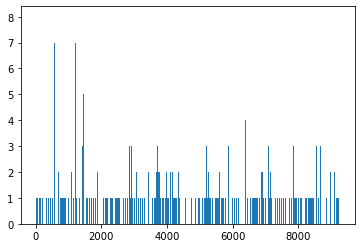

In [513]:
plt.bar(ag['pass_Id_first'], ag['PassengerId'])

In [516]:
ag= pd.DataFrame(df.groupby(['pass_Id_last']).agg({'PassengerId':'count'})).reset_index()
ag

,pass_Id_last,PassengerId
0,1,6217
1,2,1412
2,3,571
3,4,231
4,5,128
5,6,75
6,7,46
7,8,13


<BarContainer object of 8 artists>

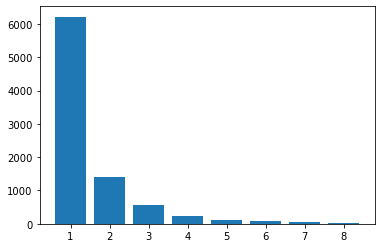

In [517]:
plt.bar(ag['pass_Id_last'], ag['PassengerId'])

In [518]:
df.set_index('PassengerId', inplace=True)
df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,pass_Id_last,Cabin_first,Cabin_end,Cabin_middle,pass_Id_first
PassengerId,,,,,,,,,,,,,,,,,
0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,B,P,0.0,1
0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,F,S,0.0,2
0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1,A,S,0.0,3
0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,2,A,S,0.0,3
0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,F,S,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,1,A,P,98.0,9276
9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,1,G,S,1499.0,9278
9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,1,G,S,1500.0,9279


In [519]:
df.isna().sum()

HomePlanet         0
CryoSleep          0
Destination        0
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Name             200
Transported        0
pass_Id_last       0
Cabin_first        0
Cabin_end          0
Cabin_middle       0
pass_Id_first      0
dtype: int64

In [520]:
df[df['CryoSleep'].isna()]

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,pass_Id_last,Cabin_first,Cabin_end,Cabin_middle,pass_Id_first
PassengerId,,,,,,,,,,,,,,,,,


In [521]:
df.loc[df['Name'].isna()]

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,pass_Id_last,Cabin_first,Cabin_end,Cabin_middle,pass_Id_first
PassengerId,,,,,,,,,,,,,,,,,
0022_01,Mars,False,TRAPPIST-1e,21.0,False,980.0,2.0,69.0,0.0,0.0,NaN,False,1,D,P,0.0,22
0064_01,Mars,True,TRAPPIST-1e,15.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True,1,F,S,14.0,64
0069_01,Earth,False,TRAPPIST-1e,42.0,False,887.0,0.0,9.0,6.0,0.0,NaN,True,1,F,S,16.0,69
0082_03,Mars,False,TRAPPIST-1e,8.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True,3,F,P,16.0,82
0108_02,Earth,False,TRAPPIST-1e,31.0,False,562.0,0.0,326.0,0.0,0.0,NaN,False,2,G,S,19.0,108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9205_02,Europa,True,TRAPPIST-1e,15.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True,2,B,P,300.0,9205
9208_01,Earth,True,TRAPPIST-1e,35.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True,1,G,S,1485.0,9208
9218_01,Europa,True,55 Cancri e,43.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True,1,B,S,353.0,9218


In [522]:
del df['Name']

In [523]:
df.isna().sum()

HomePlanet       0
CryoSleep        0
Destination      0
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Transported      0
pass_Id_last     0
Cabin_first      0
Cabin_end        0
Cabin_middle     0
pass_Id_first    0
dtype: int64

In [524]:
df= df.to_csv('df_clean.csv')

In [809]:
df= pd.read_csv('df_clean.csv')

In [810]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,pass_Id_last,Cabin_first,Cabin_end,Cabin_middle,pass_Id_first
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,B,P,0.0,1
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1,F,S,0.0,2
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,1,A,S,0.0,3
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,2,A,S,0.0,3
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1,F,S,1.0,4


In [811]:
df.select_dtypes(exclude=np.number)

,PassengerId,HomePlanet,CryoSleep,Destination,VIP,Transported,Cabin_first,Cabin_end
0,0001_01,Europa,False,TRAPPIST-1e,False,False,B,P
1,0002_01,Earth,False,TRAPPIST-1e,False,True,F,S
2,0003_01,Europa,False,TRAPPIST-1e,True,False,A,S
3,0003_02,Europa,False,TRAPPIST-1e,False,False,A,S
4,0004_01,Earth,False,TRAPPIST-1e,False,True,F,S
...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,True,False,A,P
8689,9278_01,Earth,True,PSO J318.5-22,False,False,G,S
8690,9279_01,Earth,False,TRAPPIST-1e,False,True,G,S
8691,9280_01,Europa,False,55 Cancri e,False,False,E,S


In [812]:
df.set_index('PassengerId', inplace=True)

In [813]:
#dummy

mylist = list(['HomePlanet','CryoSleep','Destination','VIP','Cabin_first','Cabin_end'])
dummies = pd.get_dummies(df[mylist], prefix= mylist)
df.drop(mylist, axis=1, inplace = True)
df = pd.concat([df,dummies], axis =1 )

In [814]:
df.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,pass_Id_last,Cabin_middle,pass_Id_first,...,Cabin_first_A,Cabin_first_B,Cabin_first_C,Cabin_first_D,Cabin_first_E,Cabin_first_F,Cabin_first_G,Cabin_first_T,Cabin_end_P,Cabin_end_S
PassengerId,,,,,,,,,,,,,,,,,,,,,
0001_01,39.0,0.0,0.0,0.0,0.0,0.0,False,1,0.0,1,...,0,1,0,0,0,0,0,0,1,0
0002_01,24.0,109.0,9.0,25.0,549.0,44.0,True,1,0.0,2,...,0,0,0,0,0,1,0,0,0,1
0003_01,58.0,43.0,3576.0,0.0,6715.0,49.0,False,1,0.0,3,...,1,0,0,0,0,0,0,0,0,1
0003_02,33.0,0.0,1283.0,371.0,3329.0,193.0,False,2,0.0,3,...,1,0,0,0,0,0,0,0,0,1
0004_01,16.0,303.0,70.0,151.0,565.0,2.0,True,1,1.0,4,...,0,0,0,0,0,1,0,0,0,1


In [815]:
df.select_dtypes(exclude=np.number)

,Transported
PassengerId,
0001_01,False
0002_01,True
0003_01,False
0003_02,False
0004_01,True
...,...
9276_01,False
9278_01,False
9279_01,True


In [816]:
y= df['Transported']
X= df.drop(['Transported'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [817]:
#Logestic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log=log_reg.predict(X_test)

pish=pd.DataFrame(data={'y_test':y_test, 'y_pred_log':y_pred_log})

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_log) )

Accuracy: 0.8027602070155262


C:\Users\enabi\miniconda3\envs\Projects\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [818]:
pish.shape

(1739, 2)

In [819]:
pish.head()

,y_test,y_pred_log
PassengerId,,
0472_01,False,False
0177_01,False,False
2618_01,True,True
7326_01,False,False
4785_01,True,True


In [820]:
y_test.head()

PassengerId
0472_01    False
0177_01    False
2618_01     True
7326_01    False
4785_01     True
Name: Transported, dtype: bool

In [821]:
pish.reset_index(inplace=True)

In [822]:
pish.head()

,PassengerId,y_test,y_pred_log
0,0472_01,False,False
1,0177_01,False,False
2,2618_01,True,True
3,7326_01,False,False
4,4785_01,True,True


In [823]:
# SVC (linear)
svc = Pipeline((
("scaler", StandardScaler()),
("linear_svc", LinearSVC(C=1, loss="hinge")),
))
svc.fit(X_train, y_train)

y_pred_SVC=svc.predict(X_test)

temp=pd.DataFrame(data={'y_pred_SVC':y_pred_SVC})

pish = pd.concat([pish, temp], axis=1)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_SVC) )

Accuracy: 0.7998849913743531


C:\Users\enabi\miniconda3\envs\Projects\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [824]:
temp.shape

(1739, 1)

In [825]:
pish.shape

(1739, 4)

In [826]:
temp.head()

,y_pred_SVC
0,False
1,False
2,True
3,False
4,True


In [827]:
pish.head()

,PassengerId,y_test,y_pred_log,y_pred_SVC
0,0472_01,False,False,False
1,0177_01,False,False,False
2,2618_01,True,True,True
3,7326_01,False,False,False
4,4785_01,True,True,True


In [828]:
# SVC (Poly)
poly_svc = Pipeline((
("scaler", StandardScaler()),
("svm_clf", SVC(kernel="poly", degree=3, C=5))
))
poly_svc.fit(X_train, y_train)

y_pred_SVC2=poly_svc.predict(X_test)

temp=pd.DataFrame(data={'y_pred_SVC2':y_pred_SVC2})

pish = pd.concat([pish, temp], axis=1)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_SVC2) )

Accuracy: 0.7889591719378953


In [829]:
pish.head()

,PassengerId,y_test,y_pred_log,y_pred_SVC,y_pred_SVC2
0,0472_01,False,False,False,False
1,0177_01,False,False,False,False
2,2618_01,True,True,True,True
3,7326_01,False,False,False,False
4,4785_01,True,True,True,True


In [830]:
# SVC (rbf)
rbf_svc = Pipeline((
("scaler", StandardScaler()),
("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
))
rbf_svc.fit(X_train, y_train)

y_pred_rbf=rbf_svc.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rbf) )

Accuracy: 0.5002875215641173


In [831]:
# RF
bag_clf1 = BaggingClassifier(
DecisionTreeClassifier(), n_estimators=500,
max_samples=100, bootstrap=True, n_jobs=-1
)
bag_clf1.fit(X_train, y_train)
y_pred_D = bag_clf1.predict(X_test)

temp=pd.DataFrame(data={'y_pred_D':y_pred_D})

pish = pd.concat([pish, temp], axis=1)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_D) )

Accuracy: 0.8050603795284647


In [832]:
pish.head(10)

,PassengerId,y_test,y_pred_log,y_pred_SVC,y_pred_SVC2,y_pred_D
0,0472_01,False,False,False,False,False
1,0177_01,False,False,False,False,False
2,2618_01,True,True,True,True,True
3,7326_01,False,False,False,False,False
4,4785_01,True,True,True,True,True
5,0646_01,True,True,True,True,True
6,0820_02,False,False,False,False,False
7,3308_01,False,False,False,False,False
8,1215_01,True,True,True,True,True
9,7105_01,True,True,True,False,False


In [833]:
# RF
bag_clf2 = BaggingClassifier(
DecisionTreeClassifier(), n_estimators=500,
bootstrap=True, n_jobs=-1, oob_score=True)
bag_clf2.fit(X_train, y_train)
bag_clf2.oob_score_
y_pred_D_oob = bag_clf2.predict(X_test)

temp=pd.DataFrame(data={'y_pred_D_oob':y_pred_D_oob})

pish = pd.concat([pish, temp], axis=1)
accuracy_score(y_test, y_pred_D_oob)

0.8131109833237493

In [834]:
pish.head(10)

,PassengerId,y_test,y_pred_log,y_pred_SVC,y_pred_SVC2,y_pred_D,y_pred_D_oob
0,0472_01,False,False,False,False,False,False
1,0177_01,False,False,False,False,False,False
2,2618_01,True,True,True,True,True,True
3,7326_01,False,False,False,False,False,False
4,4785_01,True,True,True,True,True,True
5,0646_01,True,True,True,True,True,True
6,0820_02,False,False,False,False,False,False
7,3308_01,False,False,False,False,False,False
8,1215_01,True,True,True,True,True,False
9,7105_01,True,True,True,False,False,False


In [835]:
# RF
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

temp=pd.DataFrame(data={'y_pred_rf':y_pred_rf})

pish = pd.concat([pish, temp], axis=1)
accuracy_score(y_test, y_pred_rf)

0.7648073605520413

In [836]:
pish.head(10)

,PassengerId,y_test,y_pred_log,y_pred_SVC,y_pred_SVC2,y_pred_D,y_pred_D_oob,y_pred_rf
0,0472_01,False,False,False,False,False,False,False
1,0177_01,False,False,False,False,False,False,False
2,2618_01,True,True,True,True,True,True,True
3,7326_01,False,False,False,False,False,False,False
4,4785_01,True,True,True,True,True,True,True
5,0646_01,True,True,True,True,True,True,True
6,0820_02,False,False,False,False,False,False,False
7,3308_01,False,False,False,False,False,False,False
8,1215_01,True,True,True,True,True,False,True
9,7105_01,True,True,True,False,False,False,False


In [837]:
rnd_clf.feature_importances_

array([2.39857729e-02, 1.04738574e-01, 6.64044909e-02, 5.91761754e-02,
       1.20046399e-01, 1.13937774e-01, 1.99119556e-03, 1.15877883e-02,
       8.43631146e-03, 3.60299282e-02, 2.99156335e-02, 7.35669679e-03,
       1.74086499e-01, 1.75864275e-01, 1.52086965e-03, 4.31937908e-03,
       5.41129662e-04, 1.28890446e-03, 6.87687465e-05, 2.68026402e-04,
       3.40185327e-05, 1.63914401e-04, 7.79047395e-03, 6.07813510e-03,
       3.39267661e-04, 5.25969201e-03, 1.03075989e-02, 1.55819607e-02,
       0.00000000e+00, 5.80819559e-03, 7.07215045e-03])

In [838]:
headers = ["name", "score"]
values = sorted(zip(X_train.columns, rnd_clf.feature_importances_), key=lambda x: x[1] * -1)
values

[('CryoSleep_True', 0.17586427513069627),
 ('CryoSleep_False', 0.17408649928619138),
 ('Spa', 0.12004639857403569),
 ('VRDeck', 0.1139377742292721),
 ('RoomService', 0.10473857444827207),
 ('FoodCourt', 0.06640449092759129),
 ('ShoppingMall', 0.05917617543937655),
 ('HomePlanet_Earth', 0.03602992818032774),
 ('HomePlanet_Europa', 0.02991563349664844),
 ('Age', 0.023985772871023978),
 ('Cabin_first_G', 0.015581960736066934),
 ('Cabin_middle', 0.011587788276618346),
 ('Cabin_first_F', 0.010307598890106996),
 ('pass_Id_first', 0.008436311464475687),
 ('Cabin_first_B', 0.007790473954837031),
 ('HomePlanet_Mars', 0.007356696789094613),
 ('Cabin_end_S', 0.007072150449305477),
 ('Cabin_first_C', 0.006078135098512207),
 ('Cabin_end_P', 0.005808195589489123),
 ('Cabin_first_E', 0.005259692008869824),
 ('Destination_55 Cancri e', 0.004319379077810178),
 ('pass_Id_last', 0.001991195563438571),
 ('CryoSleep_other', 0.0015208696510813308),
 ('Destination_TRAPPIST-1e', 0.0012889044606817564),
 ('Des

In [839]:
# RF
bag_clf3 = BaggingClassifier(
DecisionTreeClassifier(splitter="random", max_leaf_nodes=16),
n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1
)
bag_clf3.fit(X_train, y_train)
y_pred_D_2 = bag_clf3.predict(X_test)

temp=pd.DataFrame(data={'y_pred_D_2':y_pred_D_2})

pish = pd.concat([pish, temp], axis=1)
accuracy_score(y_test, y_pred_D_2)

0.7682576193214491

In [840]:
pish.head(10)

,PassengerId,y_test,y_pred_log,y_pred_SVC,y_pred_SVC2,y_pred_D,y_pred_D_oob,y_pred_rf,y_pred_D_2
0,0472_01,False,False,False,False,False,False,False,False
1,0177_01,False,False,False,False,False,False,False,False
2,2618_01,True,True,True,True,True,True,True,True
3,7326_01,False,False,False,False,False,False,False,False
4,4785_01,True,True,True,True,True,True,True,True
5,0646_01,True,True,True,True,True,True,True,True
6,0820_02,False,False,False,False,False,False,False,False
7,3308_01,False,False,False,False,False,False,False,False
8,1215_01,True,True,True,True,True,False,True,True
9,7105_01,True,True,True,False,False,False,False,False


In [841]:
ada_clf = AdaBoostClassifier(
DecisionTreeClassifier(max_depth=1), n_estimators=200,
algorithm="SAMME.R", learning_rate=0.5
)
ada_clf.fit(X_train, y_train)
y_pred_ada = ada_clf.predict(X_test)

temp=pd.DataFrame(data={'y_pred_ada':y_pred_ada})

pish = pd.concat([pish, temp], axis=1)
accuracy_score(y_test, y_pred_ada)

0.81196089706728

In [842]:
pish.head(10)

,PassengerId,y_test,y_pred_log,y_pred_SVC,y_pred_SVC2,y_pred_D,y_pred_D_oob,y_pred_rf,y_pred_D_2,y_pred_ada
0,0472_01,False,False,False,False,False,False,False,False,False
1,0177_01,False,False,False,False,False,False,False,False,False
2,2618_01,True,True,True,True,True,True,True,True,True
3,7326_01,False,False,False,False,False,False,False,False,False
4,4785_01,True,True,True,True,True,True,True,True,True
5,0646_01,True,True,True,True,True,True,True,True,True
6,0820_02,False,False,False,False,False,False,False,False,False
7,3308_01,False,False,False,False,False,False,False,False,False
8,1215_01,True,True,True,True,True,False,True,True,True
9,7105_01,True,True,True,False,False,False,False,False,True


In [843]:
xgb_model = XGBClassifier(
        n_estimators=300,
        max_depth=9,
        min_child_weight=1,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        learning_rate=0.1, # ok for Gridsearch
        objective='multi:softprob',
        silent=True,
        nthread=1,
        num_class=3
        )

In [844]:
xgb_model.fit(X_train,y_train)


y_pred_xgb=xgb_model.predict(X_test)

temp=pd.DataFrame(data={'y_pred_xgb':y_pred_xgb})

pish = pd.concat([pish, temp], axis=1)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_xgb) )

[21:02:19] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Accuracy: 0.8125359401955147


In [845]:
pish.head(10)

,PassengerId,y_test,y_pred_log,y_pred_SVC,y_pred_SVC2,y_pred_D,y_pred_D_oob,y_pred_rf,y_pred_D_2,y_pred_ada,y_pred_xgb
0,0472_01,False,False,False,False,False,False,False,False,False,False
1,0177_01,False,False,False,False,False,False,False,False,False,False
2,2618_01,True,True,True,True,True,True,True,True,True,True
3,7326_01,False,False,False,False,False,False,False,False,False,False
4,4785_01,True,True,True,True,True,True,True,True,True,True
5,0646_01,True,True,True,True,True,True,True,True,True,True
6,0820_02,False,False,False,False,False,False,False,False,False,False
7,3308_01,False,False,False,False,False,False,False,False,False,False
8,1215_01,True,True,True,True,True,False,True,True,True,True
9,7105_01,True,True,True,False,False,False,False,False,True,False


In [ ]:
#parameters
#ML algorithm
#fitting
#prediction
#accuracy calculation

In [941]:
# XGBoost

#parameters
params = {
        'n_estimators':[30],
        'max_depth':[9],
        'min_child_weight':[1],
        'gamma':[0.0],
        'subsample':[i/10.0 for i in range(6,10)],
        'colsample_bytree':[i/10.0 for i in range(6,10)]
        # 'subsample':[0.95],
        # 'colsample_bytree':[0.95],
    }


# Default classified which will be tuned
xgb_model = XGBClassifier(
        n_estimators=100,
        max_depth=8,
        min_child_weight=1,
        gamma=0,
        subsample=0.5,
        colsample_bytree=0.5,
        learning_rate=0.1, # ok for Gridsearch
        objective='multi:softprob',
        silent=True,
        nthread=1,
        num_class=3
        )
    
#ML algorithm
# A parameter grid for XGBoost

clf = GridSearchCV(xgb_model,
        params,
        cv=list(KFold(n_splits=5, shuffle=True).split(X_train)), # at least 5 splits
        verbose=2,
        scoring='neg_log_loss',
        n_jobs=-1
        )
    
#fitting
grid_result = clf.fit(X_train, y_train.values.ravel())

print("\n\nBest score: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

#prediction
y_pred_xgg=clf.predict(X_test)
    
temp=pd.DataFrame(data={'y_pred_xgg':y_pred_xgg})

pish = pd.concat([pish, temp], axis=1)
    
#accuracy calculation    
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_xgg) )
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
print("\nStats:")
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


C:\Users\enabi\miniconda3\envs\Projects\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


[19:39:39] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




Best score: nan using {'colsample_bytree': 0.6, 'gamma': 0.0, 'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 30, 'subsample': 0.6}
Accuracy: 0.8188614146060954

Stats:
nan (nan) with: {'colsample_bytree': 0.6, 'gamma': 0.0, 'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 30, 'subsample': 0.6}
nan (nan) with: {'colsample_bytree': 0.6, 'gamma': 0.0, 'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 30, 'subsample': 0.7}
nan (nan) with: {'colsample_bytree': 0.6, 'gamma': 0.0, 'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 30, 'subsample': 0.8}
nan (nan) with: {'colsample_bytree': 0.

In [846]:
# XGBoost
def set_gridsearch_params():
    params = {
        'n_estimators':[30],
        'max_depth':[9],
        'min_child_weight':[1],
        'gamma':[0.0],
        'subsample':[i/10.0 for i in range(6,10)],
        'colsample_bytree':[i/10.0 for i in range(6,10)]
        # 'subsample':[0.95],
        # 'colsample_bytree':[0.95],
    }
    return params


def gridsearch_run(X_train, y_train, pish):

    # Default classified which will be tuned
    xgb_model = XGBClassifier(
        n_estimators=100,
        max_depth=8,
        min_child_weight=1,
        gamma=0,
        subsample=0.5,
        colsample_bytree=0.5,
        learning_rate=0.1, # ok for Gridsearch
        objective='multi:softprob',
        silent=True,
        nthread=1,
        num_class=3
        )

    # A parameter grid for XGBoost
    params = set_gridsearch_params()

    clf = GridSearchCV(xgb_model,
        params,
        cv=list(KFold(n_splits=5, shuffle=True).split(X_train)), # at least 5 splits
        verbose=2,
        scoring='neg_log_loss',
        n_jobs=-1
        )

    grid_result = clf.fit(X_train, y_train.values.ravel())

    print("\n\nBest score: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    y_pred_xg=clf.predict(X_test)
    
    temp=pd.DataFrame(data={'y_pred_xg':y_pred_xg})

    pish = pd.concat([pish, temp], axis=1)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred_xg) )
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    print("\nStats:")
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
    return y_pred_xg

In [847]:
# Split dataset into training set and test set

gridsearch_run(X_train, y_train, pish)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


C:\Users\enabi\miniconda3\envs\Projects\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


[21:02:56] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




Best score: nan using {'colsample_bytree': 0.6, 'gamma': 0.0, 'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 30, 'subsample': 0.6}
Accuracy: 0.8188614146060954

Stats:
nan (nan) with: {'colsample_bytree': 0.6, 'gamma': 0.0, 'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 30, 'subsample': 0.6}
nan (nan) with: {'colsample_bytree': 0.6, 'gamma': 0.0, 'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 30, 'subsample': 0.7}
nan (nan) with: {'colsample_bytree': 0.6, 'gamma': 0.0, 'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 30, 'subsample': 0.8}
nan (nan) with: {'colsample_bytree': 0.

In [950]:
pish.head(20)

,PassengerId,y_test,y_pred_log,y_pred_SVC,y_pred_SVC2,y_pred_D,y_pred_D_oob,y_pred_rf,y_pred_D_2,y_pred_ada,y_pred_xgb,y_pred_xgg
0,0472_01,False,False,False,False,False,False,False,False,False,False,False
1,0177_01,False,False,False,False,False,False,False,False,False,False,False
2,2618_01,True,True,True,True,True,True,True,True,True,True,True
3,7326_01,False,False,False,False,False,False,False,False,False,False,False
4,4785_01,True,True,True,True,True,True,True,True,True,True,True
5,0646_01,True,True,True,True,True,True,True,True,True,True,True
6,0820_02,False,False,False,False,False,False,False,False,False,False,False
7,3308_01,False,False,False,False,False,False,False,False,False,False,False
8,1215_01,True,True,True,True,True,False,True,True,True,True,False
9,7105_01,True,True,True,False,False,False,False,False,True,False,False


In [951]:
pishte= pish.drop(['PassengerId','y_test'], axis=1)

In [952]:
ps=pd.DataFrame(pishte)

In [953]:
ps

,y_pred_log,y_pred_SVC,y_pred_SVC2,y_pred_D,y_pred_D_oob,y_pred_rf,y_pred_D_2,y_pred_ada,y_pred_xgb,y_pred_xgg
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False
4,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...
1734,True,True,False,True,True,False,False,False,True,False
1735,True,True,True,True,True,True,True,True,True,True
1736,False,False,False,False,False,False,False,False,False,False
1737,False,False,False,False,False,False,False,False,False,False


In [957]:
ps.loc[1734]

y_pred_log       True
y_pred_SVC       True
y_pred_SVC2     False
y_pred_D         True
y_pred_D_oob     True
y_pred_rf       False
y_pred_D_2      False
y_pred_ada      False
y_pred_xgb       True
y_pred_xgg      False
Name: 1734, dtype: bool

In [954]:
ps.mode(axis=1)

,0,1
0,False,NaN
1,False,NaN
2,True,NaN
3,False,NaN
4,True,NaN
...,...,...
1734,False,True
1735,True,NaN
1736,False,NaN
1737,False,NaN


In [947]:
y_test

PassengerId
0472_01    False
0177_01    False
2618_01     True
7326_01    False
4785_01     True
           ...  
1460_01     True
2009_02     True
3690_01     True
5111_01    False
6736_01     True
Name: Transported, Length: 1739, dtype: bool

In [958]:
print("Accuracy:",metrics.accuracy_score(y_test, ps.mode(axis=1)[0]) )

Accuracy: 0.8085106382978723


In [861]:
filt= df.index=='6736_01'
df.loc[filt,:]

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,pass_Id_last,Cabin_middle,pass_Id_first,...,Cabin_first_A,Cabin_first_B,Cabin_first_C,Cabin_first_D,Cabin_first_E,Cabin_first_F,Cabin_first_G,Cabin_first_T,Cabin_end_P,Cabin_end_S
PassengerId,,,,,,,,,,,,,,,,,,,,,
6736_01,33.0,1373.0,0.0,23.0,920.0,6.0,True,1,203.0,6736,...,0,0,0,1,0,0,0,0,0,1


In [907]:
#stack

predlog_reg = log_reg.predict(X_train)
predsvc = svc.predict(X_train)
predpoly_svc = poly_svc.predict(X_train)
predbag_clf1 = bag_clf1.predict(X_train)
predbag_clf2 = bag_clf2.predict(X_train)
predrnd_clf = rnd_clf.predict(X_train)
predbag_clf3 = bag_clf3.predict(X_train)
predada_clf = ada_clf.predict(X_train)
predxgb_model = xgb_model.predict(X_train)


In [908]:
preds = pd.DataFrame(
    {'predlog_reg': predlog_reg,
     'predsvc': predsvc,
     'predpoly_svc': predpoly_svc,
     'predbag_clf1': predbag_clf1,
     'predbag_clf2': predbag_clf2,
     'predrnd_clf': predrnd_clf,
     'predbag_clf3': predbag_clf3,
     'predada_clf': predada_clf,
     'predxgb_model': predxgb_model,
    })

In [917]:
svr_rbf = SVC(kernel='rbf')
svr_rbf.fit(preds, y_train)

SVC()

In [918]:
preds_test = pd.DataFrame(
    {'predlog_reg': log_reg.predict(X_test),
     'predsvc': svc.predict(X_test),
     'predpoly_svc': poly_svc.predict(X_test),
     'predbag_clf1': bag_clf1.predict(X_test),
     'predbag_clf2': bag_clf2.predict(X_test),
     'predrnd_clf': rnd_clf.predict(X_test),
     'predbag_clf3': bag_clf3.predict(X_test),
     'predada_clf': ada_clf.predict(X_test),
     'predxgb_model': xgb_model.predict(X_test)
    })


In [919]:
svr_rbf_predict=svr_rbf.predict(preds_test)

In [920]:
svr_rbf_predict

array([False, False,  True, ..., False, False, False])

In [921]:
accuracy_score(y_test, svr_rbf_predict)

0.8131109833237493

In [869]:
df_t= pd.read_csv('test.csv')

In [870]:
df_t.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [871]:
df_t['pass_Id_last']= df_t['PassengerId'].str[-2:]

In [872]:
df_t['pass_Id_last']= pd.to_numeric(df_t['pass_Id_last'])

In [873]:
filt= df_t['HomePlanet'].isna()
df_t.loc[filt, 'HomePlanet']= 'NA'

In [874]:
df_t['Age']= pd.to_numeric(df_t['Age'])

In [875]:
df_t['Age'].fillna(df['Age'].mean(), inplace=True)

In [876]:
filt= df_t['CryoSleep'].isna()
df_t.loc[filt,'CryoSleep']='other'

In [877]:
df_t['Cabin_first']= df_t['Cabin'].str[0]

In [878]:
filt= df_t['Cabin_first'].isna()
df_t.loc[filt, 'Cabin_first']='NA'

In [879]:
df_t['Cabin_end']= df_t['Cabin'].str[-1]

In [880]:
filt= df_t['Cabin_end'].isna()
df_t.loc[filt, 'Cabin_end']='NA'

In [881]:
df_t['Cabin_middle']= df_t['Cabin'].str.split("/",expand=True)[1]

In [882]:
df_t['Cabin_middle']= pd.to_numeric(df_t['Cabin_middle'])

In [883]:
filt= df_t['Cabin_middle'].isna()
df_t.loc[filt, 'Cabin_middle']= -1

In [884]:
filt= df_t['Destination'].isna()
df_t.loc[filt, 'Destination']='NA'

In [885]:
filt= df_t['VIP'].isna()
df_t.loc[filt, 'VIP']='other'

In [886]:
filt= df_t['RoomService'].isna()
df_t.loc[filt, 'RoomService']= -1

In [887]:
filt= df_t['FoodCourt'].isna()
df_t.loc[filt, 'FoodCourt']= -1

In [888]:
filt= df_t['ShoppingMall'].isna()
df_t.loc[filt, 'ShoppingMall']= -1

In [889]:
filt= df_t['Spa'].isna()
df_t.loc[filt, 'Spa']= -1

In [890]:
filt= df_t['VRDeck'].isna()
df_t.loc[filt, 'VRDeck']= -1

In [891]:
df_t['pass_Id_first']=df_t['PassengerId'].str.split('_',expand=True)[0]

In [892]:
df_t['pass_Id_first'] = pd.to_numeric(df_t['pass_Id_first'])

In [893]:
df_t.set_index('PassengerId', inplace=True)
df_t

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,pass_Id_last,Cabin_first,Cabin_end,Cabin_middle,pass_Id_first
PassengerId,,,,,,,,,,,,,,,,,
0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.00000,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,1,G,S,3.0,13
0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.00000,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,1,F,S,4.0,18
0019_01,Europa,True,C/0/S,55 Cancri e,31.00000,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,1,C,S,0.0,19
0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.00000,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,1,C,S,1.0,21
0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.00000,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,1,F,S,5.0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.00000,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,2,G,S,1496.0,9266
9269_01,Earth,False,NaN,TRAPPIST-1e,42.00000,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,1,NA,NA,-1.0,9269
9271_01,Mars,True,D/296/P,55 Cancri e,28.82793,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,1,D,P,296.0,9271


In [894]:
df_t.isna().sum()

HomePlanet         0
CryoSleep          0
Cabin            100
Destination        0
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Name              94
pass_Id_last       0
Cabin_first        0
Cabin_end          0
Cabin_middle       0
pass_Id_first      0
dtype: int64

In [895]:
del df_t['Cabin']
del df_t['Name']

In [896]:
df_t.isna().sum()

HomePlanet       0
CryoSleep        0
Destination      0
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
pass_Id_last     0
Cabin_first      0
Cabin_end        0
Cabin_middle     0
pass_Id_first    0
dtype: int64

In [897]:
df_t= df_t.to_csv('df_test.csv')

In [898]:
df_t= pd.read_csv('df_test.csv')

In [899]:
df_t.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,pass_Id_last,Cabin_first,Cabin_end,Cabin_middle,pass_Id_first
0,0013_01,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,1,G,S,3.0,13
1,0018_01,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,1,F,S,4.0,18
2,0019_01,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,1,C,S,0.0,19
3,0021_01,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,1,C,S,1.0,21
4,0023_01,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,1,F,S,5.0,23


In [900]:
df_t.select_dtypes(exclude=np.number)

,PassengerId,HomePlanet,CryoSleep,Destination,VIP,Cabin_first,Cabin_end
0,0013_01,Earth,True,TRAPPIST-1e,False,G,S
1,0018_01,Earth,False,TRAPPIST-1e,False,F,S
2,0019_01,Europa,True,55 Cancri e,False,C,S
3,0021_01,Europa,False,TRAPPIST-1e,False,C,S
4,0023_01,Earth,False,TRAPPIST-1e,False,F,S
...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,TRAPPIST-1e,False,G,S
4273,9269_01,Earth,False,TRAPPIST-1e,False,NaN,NaN
4274,9271_01,Mars,True,55 Cancri e,False,D,P
4275,9273_01,Europa,False,NaN,False,D,P


In [901]:
df_t.set_index('PassengerId', inplace=True)

In [923]:
df_t.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,pass_Id_last,Cabin_middle,pass_Id_first,HomePlanet_Earth,...,Cabin_first_A,Cabin_first_B,Cabin_first_C,Cabin_first_D,Cabin_first_E,Cabin_first_F,Cabin_first_G,Cabin_first_T,Cabin_end_P,Cabin_end_S
PassengerId,,,,,,,,,,,,,,,,,,,,,
0013_01,27.0,0.0,0.0,0.0,0.0,0.0,1,3.0,13,1,...,0,0,0,0,0,0,1,0,0,1
0018_01,19.0,0.0,9.0,0.0,2823.0,0.0,1,4.0,18,1,...,0,0,0,0,0,1,0,0,0,1
0019_01,31.0,0.0,0.0,0.0,0.0,0.0,1,0.0,19,0,...,0,0,1,0,0,0,0,0,0,1
0021_01,38.0,0.0,6652.0,0.0,181.0,585.0,1,1.0,21,0,...,0,0,1,0,0,0,0,0,0,1
0023_01,20.0,10.0,0.0,635.0,0.0,0.0,1,5.0,23,1,...,0,0,0,0,0,1,0,0,0,1


In [902]:
#dummy

mylist = list(['HomePlanet','CryoSleep','Destination','VIP','Cabin_first','Cabin_end'])
dummies = pd.get_dummies(df_t[mylist], prefix= mylist)
df_t.drop(mylist, axis=1, inplace = True)
df_t = pd.concat([df_t,dummies], axis =1 )

In [931]:
# RF

y_prediction = bag_clf2.predict(df_t)
y_prediction

array([ True, False,  True, ...,  True,  True, False])

In [933]:
df_submit= pd.DataFrame(data=y_prediction, index= df_t.index, columns=['Transported'])

In [934]:
df_submit

,Transported
PassengerId,
0013_01,True
0018_01,False
0019_01,True
0021_01,True
0023_01,True
...,...
9266_02,True
9269_01,False
9271_01,True


In [935]:
df_submit.to_csv('sample_submission.csv')

In [938]:
79.4
y_D = bag_clf1.predict(df_t)
df_submit= pd.DataFrame(data=y_D, index= df_t.index, columns=['Transported'])
df_submit.to_csv('sample_submission.csv')

In [939]:
79.3
y_D_oob = bag_clf2.predict(df_t)
df_submit= pd.DataFrame(data=y_D_oob, index= df_t.index, columns=['Transported'])
df_submit.to_csv('sample_submission.csv')

In [ ]:
y_xgb=xgb_model.predict(df_t)
df_submit= pd.DataFrame(data=y_xgb, index= df_t.index, columns=['Transported'])
df_submit.to_csv('sample_submission.csv')

In [960]:

y_xgg=clf.predict(df_t)
df_submit= pd.DataFrame(data=y_xgg, index= df_t.index, columns=['Transported'])
df_submit.to_csv('sample_submission.csv')